In [60]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('pre-processed_data.csv')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,8,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,8,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,8,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,8,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [54]:
df_cor = df.copy()

In [55]:
for col in df.columns:
    if df_cor[col].dtype == 'int64' or col == 'area':
        df_cor = df_cor.drop(columns=[f'{col}'])

In [56]:
df_cor

,FFMC,DMC,DC,ISI,temp,wind,rain
0,86.2,26.2,94.3,5.1,8.2,6.7,0.0
1,90.6,35.4,669.1,6.7,18.0,0.9,0.0
2,90.6,43.7,686.9,6.7,14.6,1.3,0.0
3,91.7,33.3,77.5,9.0,8.3,4.0,0.2
4,89.3,51.3,102.2,9.6,11.4,1.8,0.0
...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,2.7,0.0
513,81.6,56.7,665.6,1.9,21.9,5.8,0.0
514,81.6,56.7,665.6,1.9,21.2,6.7,0.0
515,94.4,146.0,614.7,11.3,25.6,4.0,0.0


In [62]:
cor_data = df_cor.corr()
cor_data

,FFMC,DMC,DC,ISI,temp,wind,rain
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.028485,0.056702
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,-0.105342,0.074790
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.203466,0.035861
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,0.106826,0.067668
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.227116,0.069491
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,1.000000,0.061119
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.061119,1.000000


<Axes: >

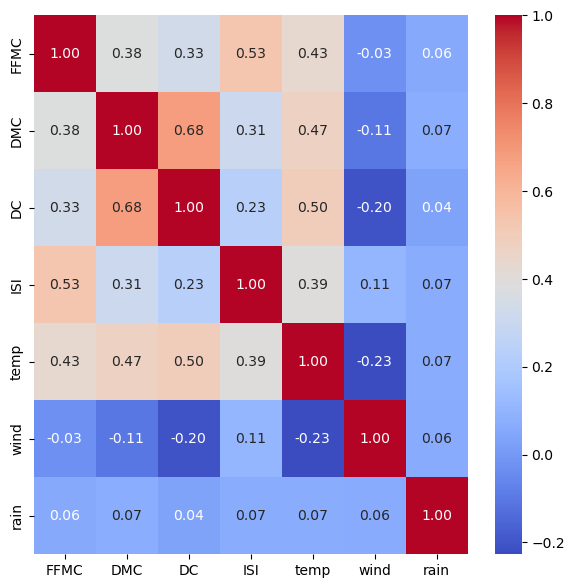

In [61]:
plt.figure(figsize=(7, 7))
sns.heatmap(cor_data, annot=True, cmap='coolwarm', fmt=".2f")

# Model

In [64]:
class LinearRegression:
    def rmse(self, Y: np.ndarray , Y_pred: np.ndarray ) -> float:
        #calculate root-mean-square error
        delta = Y - Y_pred

        return (delta**2).mean()**0.5
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        # optimize weights 
        inv_cov = np.linalg.inv(X.T @ X)
        self.thelta = inv_cov @ (X.T @ y)

    def predict(self, X: np.ndarray) -> np.ndarray:
        # predict the area (output)
        y = self.thelta.T @ X.T

        return y

Chúng ta thấy rằng DCM và DC có cor là 0.68 (cao nhất trong cor_mat) nên chúng ta chọn bỏ 1 trong 2. Ở đây ta sẽ bỏ feature DMC

In [79]:
X_Y = df.drop(columns =['DMC']).to_numpy()

In [80]:
row = df.shape[0]
X_Y_train, X_Y_test = np.split(X_Y, indices_or_sections=[int(0.8*row)])

In [82]:
X_Y_train

array([[ 7.  ,  5.  ,  3.  , ...,  6.7 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  0.9 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  1.3 ,  0.  ,  0.  ],
       ...,
       [ 6.  ,  3.  ,  2.  , ...,  2.7 ,  0.  ,  0.  ],
       [ 7.  ,  4.  ,  2.  , ...,  9.4 ,  0.  ,  4.62],
       [ 9.  ,  4.  ,  7.  , ...,  4.5 ,  0.  ,  1.63]])

In [85]:
X_Y_test

array([[  7.  ,   5.  ,   8.  , ...,   3.6 ,   0.  ,   0.  ],
       [  5.  ,   4.  ,   8.  , ...,   4.  ,   0.  ,   0.  ],
       [  8.  ,   6.  ,   8.  , ...,   4.9 ,   0.  , 746.28],
       ...,
       [  7.  ,   4.  ,   8.  , ...,   6.7 ,   0.  ,  11.16],
       [  1.  ,   4.  ,   8.  , ...,   4.  ,   0.  ,   0.  ],
       [  6.  ,   3.  ,  11.  , ...,   4.5 ,   0.  ,   0.  ]])

In [86]:
lr = LinearRegression()

In [87]:
X_train = X_Y_train[:,:11]
Y_train = X_Y_train[:,11:]

X_test = X_Y_test[:, :11]
Y_test = X_Y_test[:, 11:]

In [89]:
lr.fit(X_test, Y_test)

In [90]:
Y_predicted = lr.predict(X_test)

In [91]:
Y_predicted

array([[ 35.03895432,  12.05811551,  58.94247579,  32.04277569,
         31.78697569,  12.03838345,   8.32954011,  66.09442799,
         29.8191167 ,  48.08763683,  -6.043485  ,  44.44063987,
        -15.41575722,  26.49813793,  19.15751937,  16.99174501,
          7.55751893,  27.81755434,  -4.05018002,  61.63939275,
         -6.52919426,  -1.83790573,  -7.30895119,  46.64493504,
          7.73018311,   2.94214665, -18.35171437,   5.08462693,
         49.42749236,  12.58995263,  -4.90013343,  -6.51222239,
          1.908351  ,  -3.24168984,  17.10928307,   8.97678913,
         19.59325512,  28.1019427 , -26.05214098,  30.04154406,
          6.51182354,  -4.33480981,   0.67721178, -12.99448307,
          1.82140109,  30.56400364,  32.61757931,  -1.98979325,
         30.56400364,  -3.3965756 ,  19.54244423,  12.80654606,
        -54.18246112,  31.58656705,   5.22868326,  14.16951967,
         34.47396572,  17.43218929,   6.59296649,  24.98285882,
         31.38103581,  12.9067238 ,  41.

In [92]:
lr.rmse(Y_test, Y_predicted)

82.61314088034142

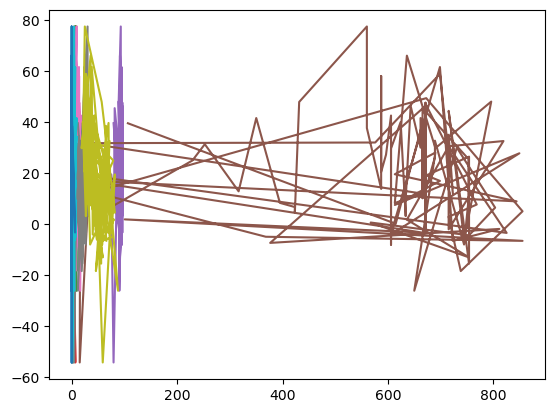

In [93]:
plt.plot(X_test, Y_predicted.T)